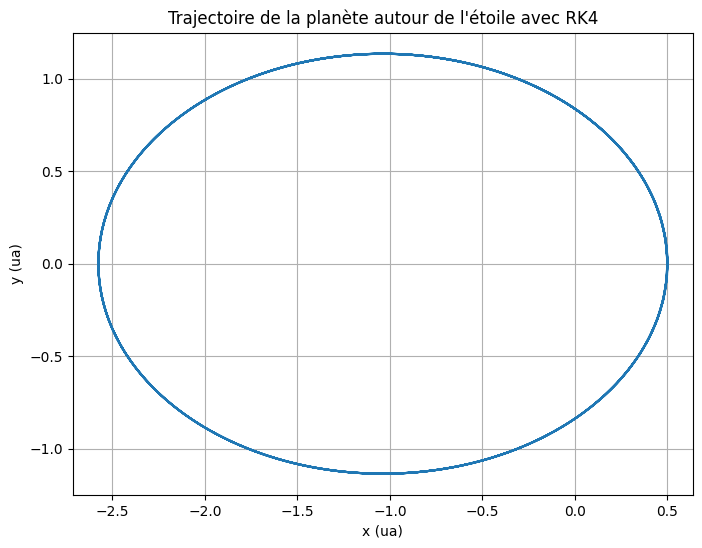

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de la simulation
G = 4 * np.pi**2  # Constante gravitationnelle dans les unités astronomiques
dt = 0.01  
T = 1
N = int(T/dt)       # Pas de temps
        # Nombre d'itérations

# Tableaux pour stocker les positions et vitesses
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)

# Conditions initiales
x[0] = 0.5 # position x initiale au périhélie
y[0] = 0   # position y initiale
vx[0] = 0  # vitesse initiale en x
vy[0] = 11.5 # vitesse initiale en y pour une orbite elliptique

# Fonctions pour les dérivées de vitesse et de position
def ax(x, y):
    return -G * x / (x**2 + y**2)**1.5

def ay(x, y):
    return -G * y / (x**2 + y**2)**1.5

# Intégration numérique avec la méthode de Runge-Kutta d'ordre 4
for n in range(N-1):
    k1x = vx[n]
    k1y = vy[n]
    k1vx = ax(x[n], y[n])
    k1vy = ay(x[n], y[n])

    k2x = vx[n] + dt/2 * k1vx
    k2y = vy[n] + dt/2 * k1vy
    k2vx = ax(x[n] + dt/2 * k1x, y[n] + dt/2 * k1y)
    k2vy = ay(x[n] + dt/2 * k1x, y[n] + dt/2 * k1y)

    k3x = vx[n] + dt/2 * k2vx
    k3y = vy[n] + dt/2 * k2vy
    k3vx = ax(x[n] + dt/2 * k2x, y[n] + dt/2 * k2y)
    k3vy = ay(x[n] + dt/2 * k2x, y[n] + dt/2 * k2y)

    k4x = vx[n] + dt * k3vx
    k4y = vy[n] + dt * k3vy
    k4vx = ax(x[n] + dt * k3x, y[n] + dt * k3y)
    k4vy = ay(x[n] + dt * k3x, y[n] + dt * k3y)

    x[n+1] = x[n] + dt * (k1x + 2*k2x + 2*k3x + k4x) / 6
    y[n+1] = y[n] + dt * (k1y + 2*k2y + 2*k3y + k4y) / 6
    vx[n+1] = vx[n] + dt * (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6
    vy[n+1] = vy[n] + dt * (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6

# Affichage de la trajectoire
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Trajectoire de la planète autour de l\'étoile avec RK4')
plt.xlabel('x (ua)')
plt.ylabel('y (ua)')
plt.axis('equal')
plt.grid(True)
plt.show()
